In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv('spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]  # Selecting relevant columns

In [ ]:
#Shape Of Data
data.shape

(5572, 2)

In [ ]:
#Info Of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
#NULL Data
data.isna().sum()

v1    0
v2    0
dtype: int64

In [ ]:
data.describe

<bound method NDFrame.describe of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [ ]:
data.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

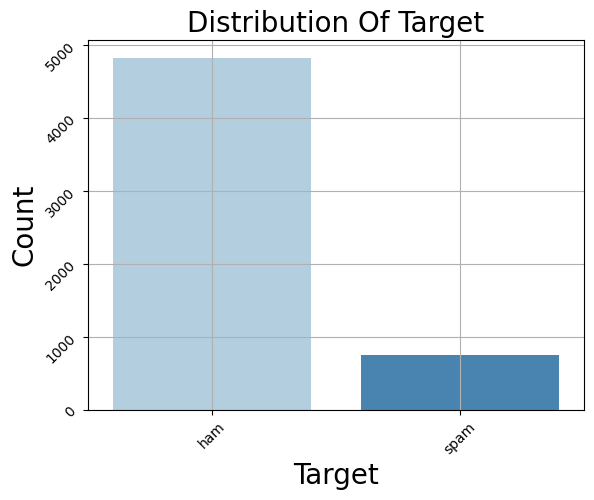

In [ ]:
sns.countplot(x='v1',data=data,palette='Blues')
plt.title('Distribution Of Target',fontsize=20)
plt.xlabel('Target',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
# Preprocessing
le = LabelEncoder()
data['v1'] = le.fit_transform(data['v1'])  # Convert labels to binary

X = data['v2']
y = data['v1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Tokenization and Padding
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 150
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [ ]:

# Model
embedding_dim = 100

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,117,377
Trainable params: 1,117,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training
batch_size = 64
epochs = 5
model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/5
56/56 [==============================] - 23s 362ms/step - loss: 0.2777 - accuracy: 0.9046 - val_loss: 0.0870 - val_accuracy: 0.9798
Epoch 2/5
56/56 [==============================] - 19s 348ms/step - loss: 0.0428 - accuracy: 0.9871 - val_loss: 0.0521 - val_accuracy: 0.9865
Epoch 3/5
56/56 [==============================] - 20s 350ms/step - loss: 0.0177 - accuracy: 0.9941 - val_loss: 0.0517 - val_accuracy: 0.9865
Epoch 4/5
56/56 [==============================] - 27s 484ms/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.0508 - val_accuracy: 0.9854
Epoch 5/5
56/56 [==============================] - 30s 543ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0625 - val_accuracy: 0.9854


In [ ]:
# Evaluation
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))

35/35 [==============================] - 1s 32ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.88      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
def classify_sms(text):
    # Preprocessing the text
    text_seq = tokenizer.texts_to_sequences([text])
    text_pad = pad_sequences(text_seq, maxlen=max_sequence_length)

    # Predicting the class
    prob = model.predict(text_pad)[0][0]
    if prob > 0.5:
        return "spam"
    else:
        return "ham"

In [ ]:
custom_sms_spam1 = "Congratulations! You've won a free vacation. Claim now!"
predicted_class_spam1 = classify_sms(custom_sms_spam1)
print("Predicted class:", predicted_class_spam1)


1/1 [==============================] - 0s 41ms/step
Predicted class: spam


In [ ]:
custom_sms_ham1 = "Hi there! Just checking in to see how you're doing."
predicted_class_ham1 = classify_sms(custom_sms_ham1)
print("Predicted class:", predicted_class_ham1)


1/1 [==============================] - 0s 31ms/step
Predicted class: ham


In [ ]:
custom_sms_ham2 = "Hey, are we still meeting for lunch tomorrow?"
predicted_class_ham2= classify_sms(custom_sms_ham2)
print("Predicted class:", predicted_class_ham2)

1/1 [==============================] - 0s 26ms/step
Predicted class: ham


In [ ]:
custom_sms_spam2 = "URGENT: You've won a $1000 gift card! Click here to claim."
predicted_class_spam2  = classify_sms(custom_sms_spam2)
print("Predicted class:", predicted_class_spam2)

1/1 [==============================] - 0s 46ms/step
Predicted class: spam


In [ ]:
custom_sms_ham3 = "Hello, it's been a while. How have you been?"
predicted_class_ham3 = classify_sms(custom_sms_ham3)
print("Predicted class:", predicted_class_ham3)

1/1 [==============================] - 0s 28ms/step
Predicted class: ham


In [ ]:
custom_sms_spam3 = "You've been selected for a free vacation getaway! Click now to claim."
predicted_class_spam3  = classify_sms(custom_sms_spam3)
print("Predicted class:", predicted_class_spam3)


1/1 [==============================] - 0s 38ms/step
Predicted class: spam
